In [2]:
#!pip install wordcloud

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS


from PIL import Image
import numpy as np

In [3]:
# Reading the csv file and storing it in a dataframe called df.
df = pd.read_csv("data/netflix_clean.csv", index_col = 0)
df.head(2)

,title,director,cast,country,language,rating,genre,premiere,date_added,duration,imdb_score,genre2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,English,PG-13,documentary,2020-10-02,2021-09-25,90.0,7.5,documentary
1,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",English,R,action,2020-04-24,2021-09-01,82.0,6.7,action


In [4]:
df.dtypes

title          object
director       object
cast           object
country        object
language       object
rating         object
genre          object
premiere       object
date_added     object
duration      float64
imdb_score    float64
genre2         object
dtype: object

In [5]:
df["date_added"] =pd.to_datetime(df["date_added"])
df["premiere"] =pd.to_datetime(df["premiere"])

# MÍO

## películas por año

In [20]:
df_año_premiere = df.groupby(df['premiere'].dt.year)['title'].count().reset_index()
df_año_premiere.columns = ['premiere', 'conteo']
df_año_premiere

,premiere,conteo
0,2014,1
1,2015,9
2,2016,28
3,2017,57
4,2018,85
5,2019,107
6,2020,164
7,2021,62


In [21]:
df_año_añadido = df.groupby(df['date_added'].dt.year)['title'].count().reset_index()
df_año_añadido.columns = ['año', 'conteo']
df_año_añadido

,año,conteo
0,2015,10
1,2016,28
2,2017,57
3,2018,83
4,2019,107
5,2020,164
6,2021,64


''

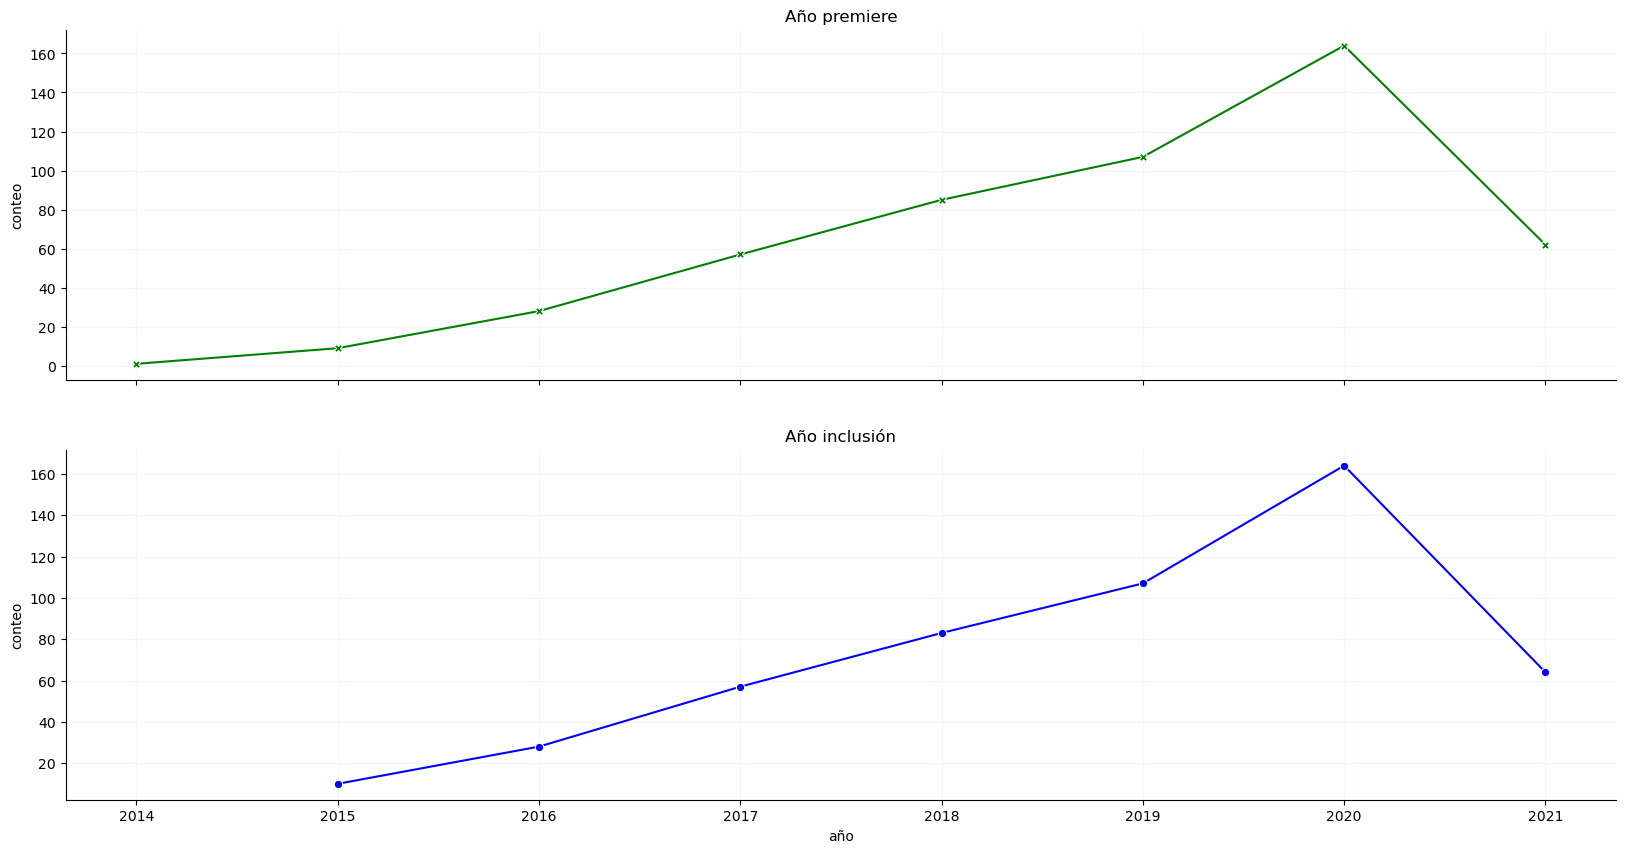

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 10), sharex = True) ## indicamos que comparten eje

sns.lineplot(data = df_año_premiere, 
    x = 'premiere', 
    y = 'conteo', 
    ax = axes[0],
    marker = "X",
    color = 'green'
    )
sns.lineplot(data = df_año_añadido, 
    x = 'año', 
    y = 'conteo', 
    ax = axes[1],
    marker = 'o',
    color = 'blue'
    )

### titulos, markers, ticks van fuera de la gráfica
axes[0].set_title('Año premiere') ##ojo, si son una gráfica unitaria es title
axes[1].set_title('Año inclusión')

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[0].grid(color = 'aliceblue')
axes[1].grid(color = 'aliceblue')
;

In [60]:
df_año_full = df_año_premiere.merge(df_año_añadido, left_on = 'premiere', right_on='año', how = 'left')
df_año_full.columns = ['año_premiere', 'conteo_premiere', 'año_añadido', 'conteo_añadido']
df_año_full.drop(['año_añadido'], axis = 1, inplace = True)
df_año_full = df_año_full[['conteo_premiere','conteo_añadido', 'año_premiere']]
df_año_full.head()

,conteo_premiere,conteo_añadido,año_premiere
0,1,NaN,2014
1,9,10.0,2015
2,28,28.0,2016
3,57,57.0,2017
4,85,83.0,2018


In [48]:
df_año_full

,año_premiere,conteo_premiere,conteo_añadido
0,2014,1,NaN
1,2015,9,10.0
2,2016,28,28.0
3,2017,57,57.0
4,2018,85,83.0
5,2019,107,107.0
6,2020,164,164.0
7,2021,62,64.0


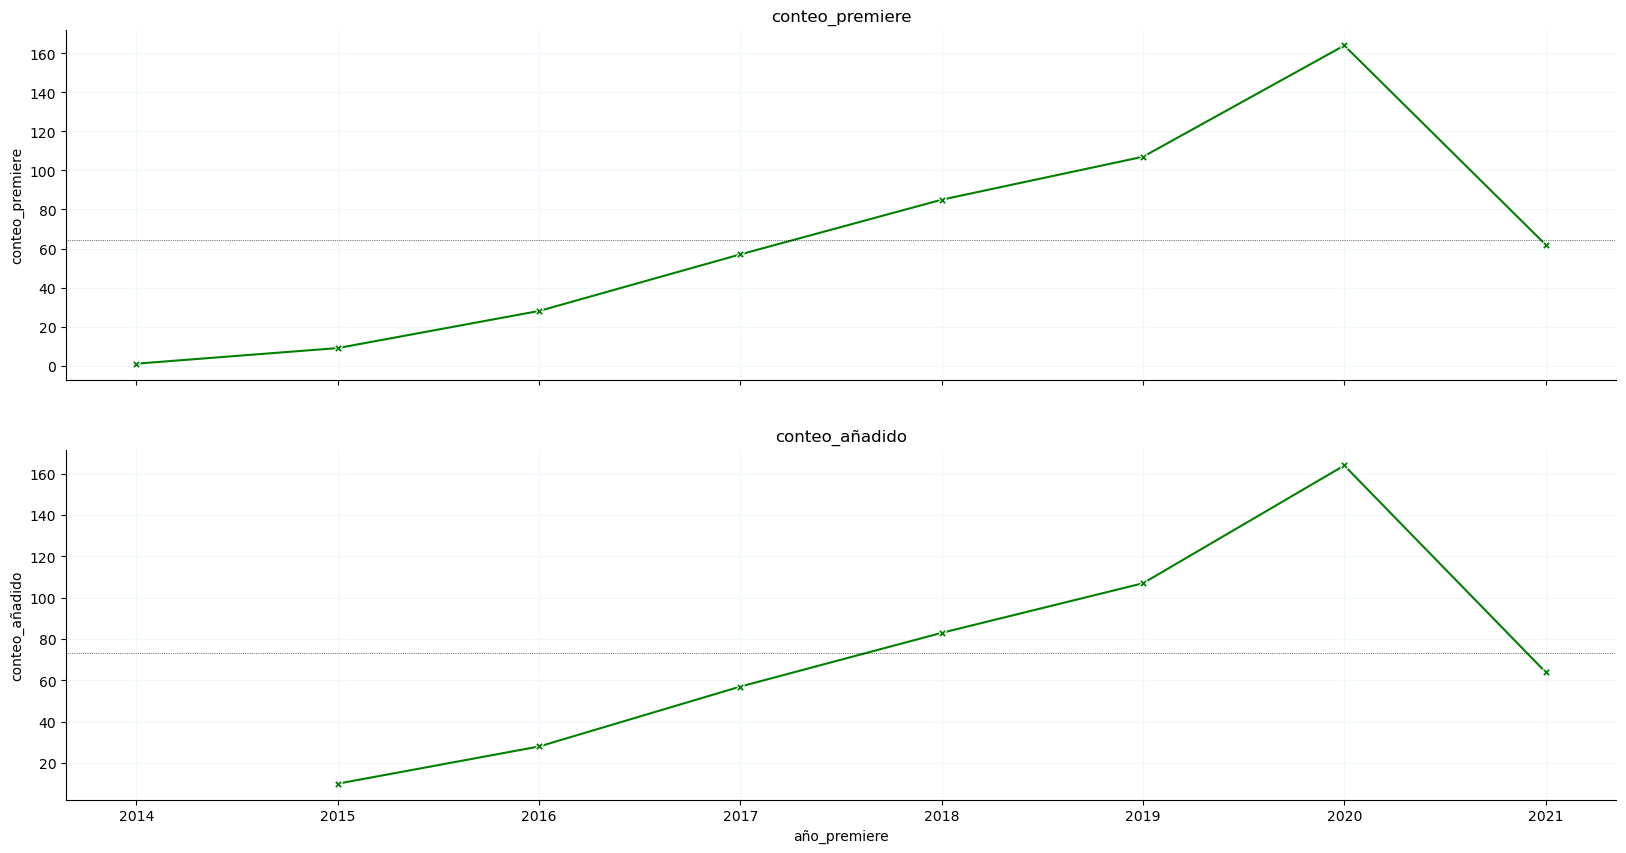

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)

axes.flatten ## --> pa que funcione el enumerate, cuando tienes una matriz de charts 

for indice, columna in enumerate(df_año_full.columns.drop('año_premiere')):
    sns.lineplot(data = df_año_full, 
        x = 'año_premiere', 
        y = columna, 
        ax = axes[indice],
        marker = "X",
        color = 'green'
        )

    ### titulos, markers, ticks van fuera de la gráfica
    axes[indice].set_title(columna) ##ojo, si son una gráfica unitaria es title

    axes[indice].spines['top'].set_visible(False)
    axes[indice].spines['right'].set_visible(False)

    axes[indice].grid(color = 'aliceblue')

    media = df_año_full[columna].mean()

    axes[indice].axhline(media, color = 'black', linewidth = 0.5, linestyle = 'dotted')

# directores y autores

In [64]:
df_directors = pd.read_csv("data/top10_directors.csv", sep = ";")
df_actors = pd.read_csv("data/top10_actors.csv", sep = ";")

In [65]:
df_actors.head()

,name,image,description,positions,known_for,Banda sonora,Guion y continuidad,Composición,sonido de archivo,Música,Como sí mismos,Agradecimientos,metraje de archivo,Producción,Dirección,Equipos adicionales
0,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El aguador,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
1,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,"6,1",34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
2,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,Bobby Boucher,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
3,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,1998,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
4,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El chico ideal,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN


In [73]:
print('mis actores son:', list(df_actors['name'].unique()))
actor = input('elige un actor: ')
print(actor)


mis actores son: ['Adam Sandler', 'Maya Rudolph', 'Andrew Bachelor', 'Keegan-Michael Key', 'Robbie Amell', 'Jacki Weaver', 'Rob Schneider', 'Nick Swardson', 'Lakeith Stanfield', 'Zachary Quinto']
Adam Sandler


In [78]:
df_actors.columns.tolist()[-11:-6] + df_actors.columns.tolist()[-5:]

['Banda sonora',
 'Guion y continuidad',
 'Composición',
 'sonido de archivo',
 'Música',
 'Agradecimientos',
 'metraje de archivo',
 'Producción',
 'Dirección',
 'Equipos adicionales']

In [86]:
df_pamichart = df_actors.drop_duplicates(subset='name').reset_index()
df_pamichart.head()

,index,name,image,description,positions,known_for,Banda sonora,Guion y continuidad,Composición,sonido de archivo,Música,Como sí mismos,Agradecimientos,metraje de archivo,Producción,Dirección,Equipos adicionales
0,0,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El aguador,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
1,16,Maya Rudolph,https://m.media-amazon.com/images/M/MV5BMTMzOT...,"Maya Rudolph was born on July 27, 1972 in Gain...",Reparto Producción Guion,La boda de mi mejor amiga,29.0,NaN,NaN,NaN,1.0,120.0,7.0,35.0,NaN,NaN,NaN
2,32,Andrew Bachelor,https://m.media-amazon.com/images/M/MV5BOTUyMT...,"Over the last few years, Andrew Bachelor, bett...",Reparto Dirección Guion,The Babysitter,1.0,NaN,NaN,NaN,1.0,35.0,NaN,NaN,7.0,NaN,NaN
3,48,Keegan-Michael Key,https://m.media-amazon.com/images/M/MV5BZmI1MD...,"Keegan-Michael Key was born in Southfield, Mic...",Reparto Guion Producción,Keanu,9.0,NaN,NaN,NaN,NaN,146.0,1.0,9.0,NaN,NaN,NaN
4,65,Robbie Amell,https://m.media-amazon.com/images/M/MV5BMjE2OT...,"Along with his sister, Robbie Amell started ac...",Reparto Producción,Upload,NaN,NaN,NaN,NaN,NaN,27.0,1.0,2.0,NaN,NaN,NaN


In [90]:
actores = list(df_actors['name'].unique())
print('mis actores son:', list(df_actors['name'].unique()))
actor = input('elige un actor: ')
print(actor)


for indice, columna in enumerate(df_pamichart[df_actors.columns.tolist()[-11:-6] + df_actors.columns.tolist()[-5:]]):
    #print(indice, columna)
    print(actores.index(actor))
    indice_filtro = actores.index(actor)

mis actores son: ['Adam Sandler', 'Maya Rudolph', 'Andrew Bachelor', 'Keegan-Michael Key', 'Robbie Amell', 'Jacki Weaver', 'Rob Schneider', 'Nick Swardson', 'Lakeith Stanfield', 'Zachary Quinto']
Adam Sandler
0 Banda sonora
0
1 Guion y continuidad
0
2 Composición
0
3 sonido de archivo
0
4 Música
0
5 Agradecimientos
0
6 metraje de archivo
0
7 Producción
0
8 Dirección
0
9 Equipos adicionales
0


TypeError: unhashable type: 'numpy.ndarray'

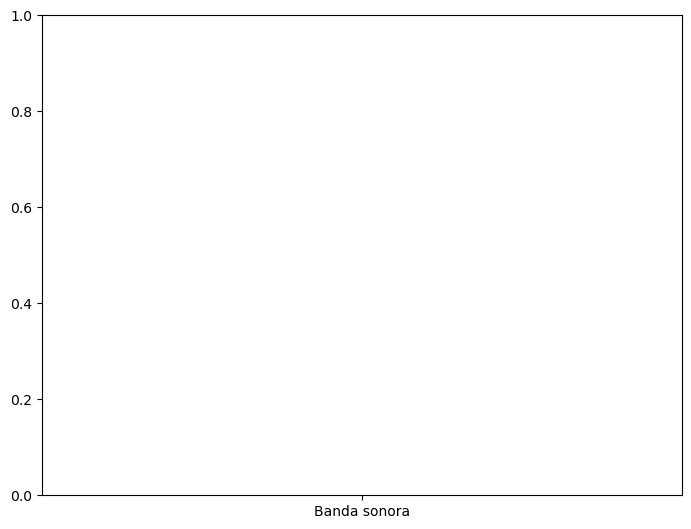

In [79]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = df_actors.columns.tolist()[-11:-6] + df_actors.columns.tolist()[-5:]
students = df_actors[df_actors['name'] == actor, df_actors.columns.tolist()[-11:-6] + df_actors.columns.tolist()[-5:]]
ax.bar(langs,students)
plt.show()

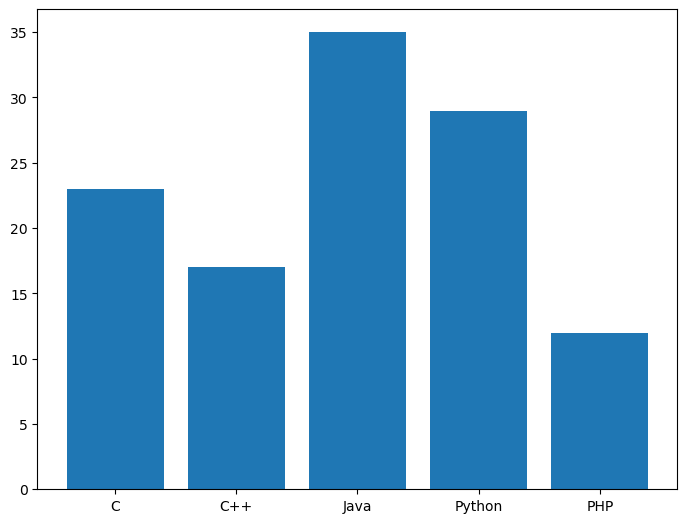

In [74]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()

C:\Users\annas\AppData\Local\Temp\ipykernel_23448\41571793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccion.drop_duplicates(subset = 'name', inplace = True)
C:\Users\annas\AppData\Local\Temp\ipykernel_23448\41571793.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccion.drop('Como sí mismos', axis = 1, inplace=True)


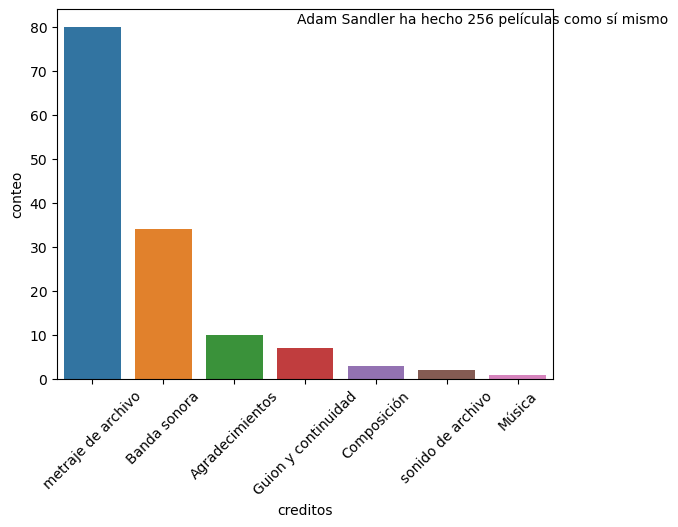

In [132]:
actor = input(f"Elige un actor de {df_actors['name'].unique()}")

df_seleccion = df_actors[df_actors['name'] == actor]
df_seleccion.drop_duplicates(subset = 'name', inplace = True)
#df_seleccion.loc[actor, :]
ellos = int(df_seleccion['Como sí mismos'].unique()[0])
df_seleccion.drop('Como sí mismos', axis = 1, inplace=True)
df_seleccion = df_seleccion.iloc[:, 5:].T.reset_index() ## las filas tienen que ser columnas!!!
df_seleccion.columns = ['creditos', 'conteo']
df_seleccion.dropna(inplace = True)
df_seleccion.sort_values(by='conteo', ascending = False, inplace=True)
sns.barplot(data = df_seleccion, x = 'creditos', y = 'conteo')
plt.figtext(0.5,0.85, f'{actor} ha hecho {ellos} películas como sí mismo', horizontalalignment = 'left')
plt.xticks(rotation = 45);

barplot, countplot
- número de películas por género

In [133]:
df.head()

,title,director,cast,country,language,rating,genre,premiere,date_added,duration,imdb_score,genre2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,English,PG-13,documentary,2020-10-02,2021-09-25,90.0,7.5,documentary
1,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",English,R,action,2020-04-24,2021-09-01,82.0,6.7,action
2,Prime Time,Jakub Piątek,"Bartosz Bielenia, Magdalena Popławska, Andrzej...",Unknown,Polish,TV-MA,thriller,2021-04-14,2021-06-30,101.0,5.7,thriller
3,Blue Miracle,Julio Quintana,"Jimmy Gonzales, Dennis Quaid, Anthony Gonzalez...",United States,English,TV-PG,drama,2021-05-27,2021-05-27,101.0,6.7,drama
4,Ghost Lab,Paween Purijitpanya,"Thanapob Leeratanakachorn, Paris Intarakomalya...",Thailand,Thai,TV-MA,horror,2021-05-26,2021-05-27,118.0,5.2,horror


In [153]:
df['genre2'].unique()

array(['documentary', 'action', 'thriller', 'drama', 'horror', 'biopic',
       'Other', 'comedy', 'crime drama', 'romantic comedy',
       'comedy-drama'], dtype=object)

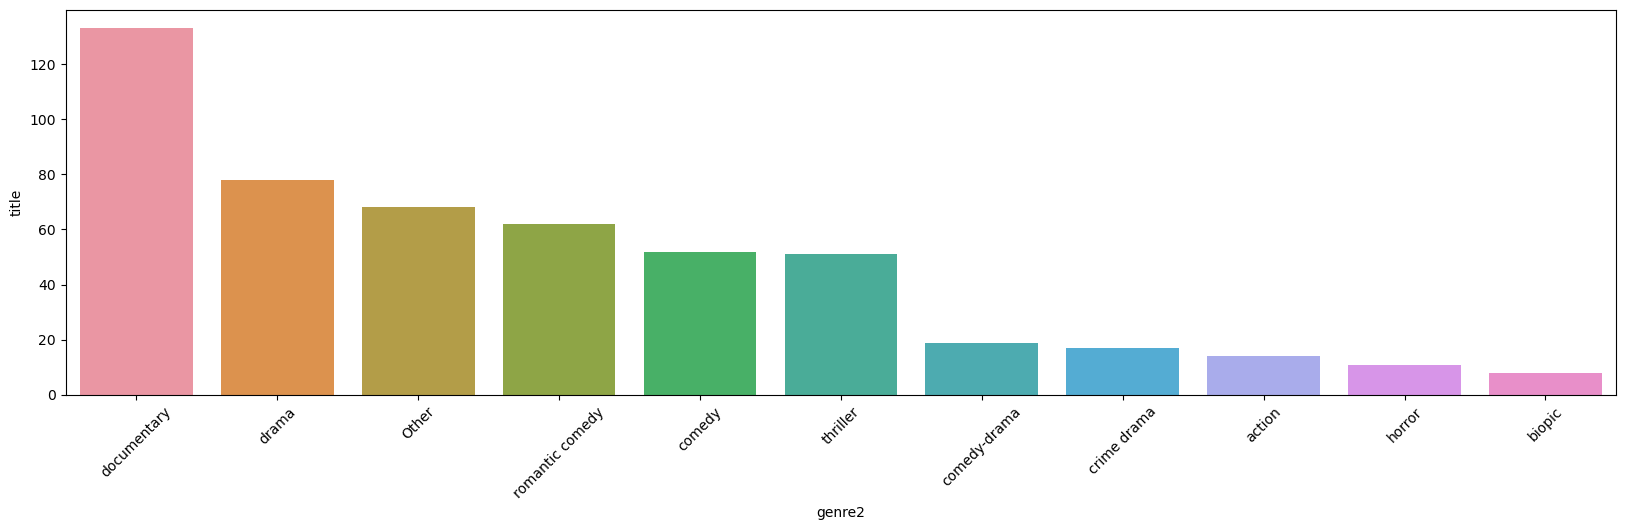

In [155]:
df_genre = df.groupby(df['genre2'])['title'].count().reset_index().sort_values(by='title', ascending = False)
plt.figure(figsize=(20,5))
sns.barplot(data = df_genre, x = 'genre2', y = 'title')
plt.xticks(rotation = 45);

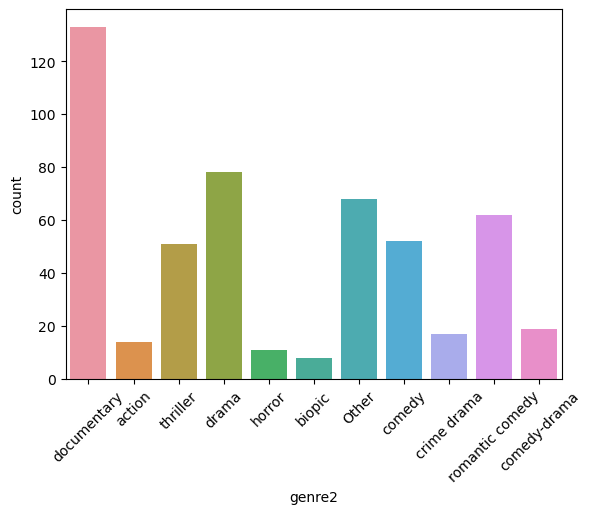

In [152]:
sns.countplot(data = df, x = 'genre2')
plt.xticks(rotation = 45);

''

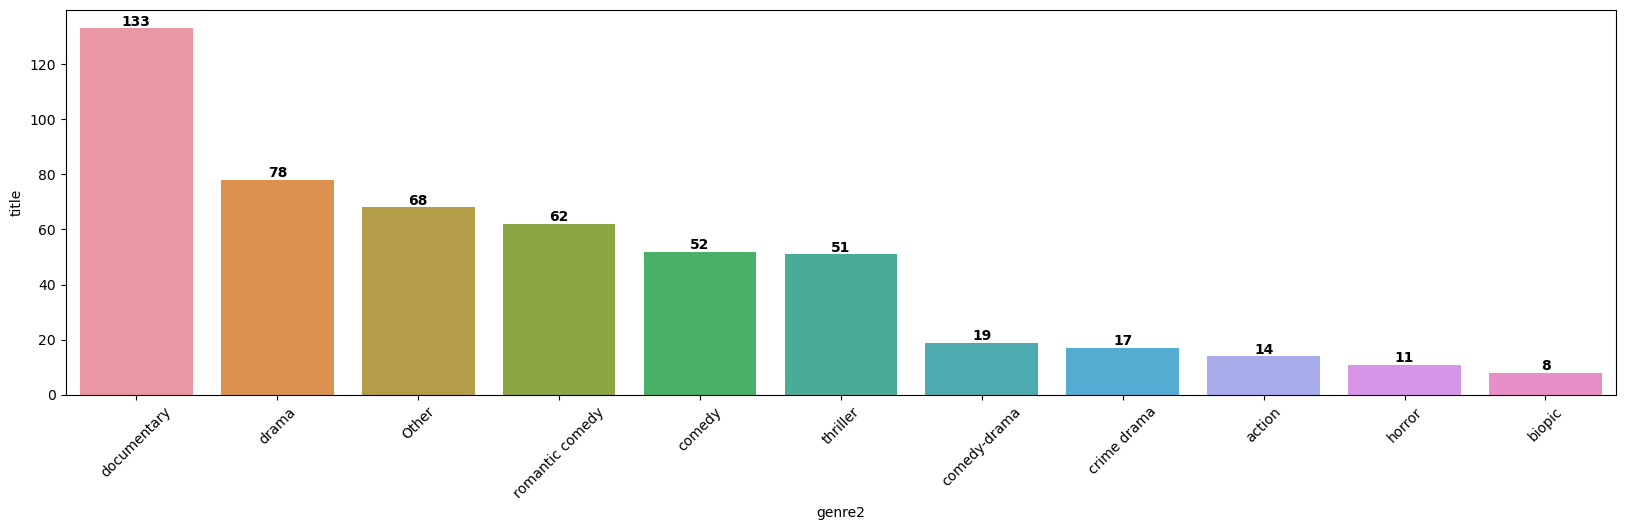

In [161]:
df_genre = df.groupby(df['genre2'])['title'].count().reset_index().sort_values(by='title', ascending = False)

ejex = df_genre['genre2'].unique().tolist()
ejey = df_genre['title'].unique().tolist()

plt.figure(figsize=(20,5))

fig = sns.barplot(data = df_genre, x = 'genre2', y = 'title')
plt.xticks(rotation = 45)

for etiqueta, valor in zip(ejex, ejey):
    fig.annotate(valor, 
        (ejex.index(etiqueta), valor + 1),
        fontweight = 'bold',
        horizontalalignment = 'center'
    )
;

# ORIGINAL

# Peliculas por año
Basado en la premier y el año en el que se añadió a Netfli

In [95]:
df_año_aña = df.groupby(df["date_added"].dt.year)["title"].count().reset_index()
df_año_aña

,date_added,title
0,2015,10
1,2016,28
2,2017,57
3,2018,83
4,2019,107
5,2020,164
6,2021,64


In [96]:
df_año_pre = df.groupby(df["premiere"].dt.year)["title"].count().reset_index()
df_año_pre

,premiere,title
0,2014,1
1,2015,9
2,2016,28
3,2017,57
4,2018,85
5,2019,107
6,2020,164
7,2021,62


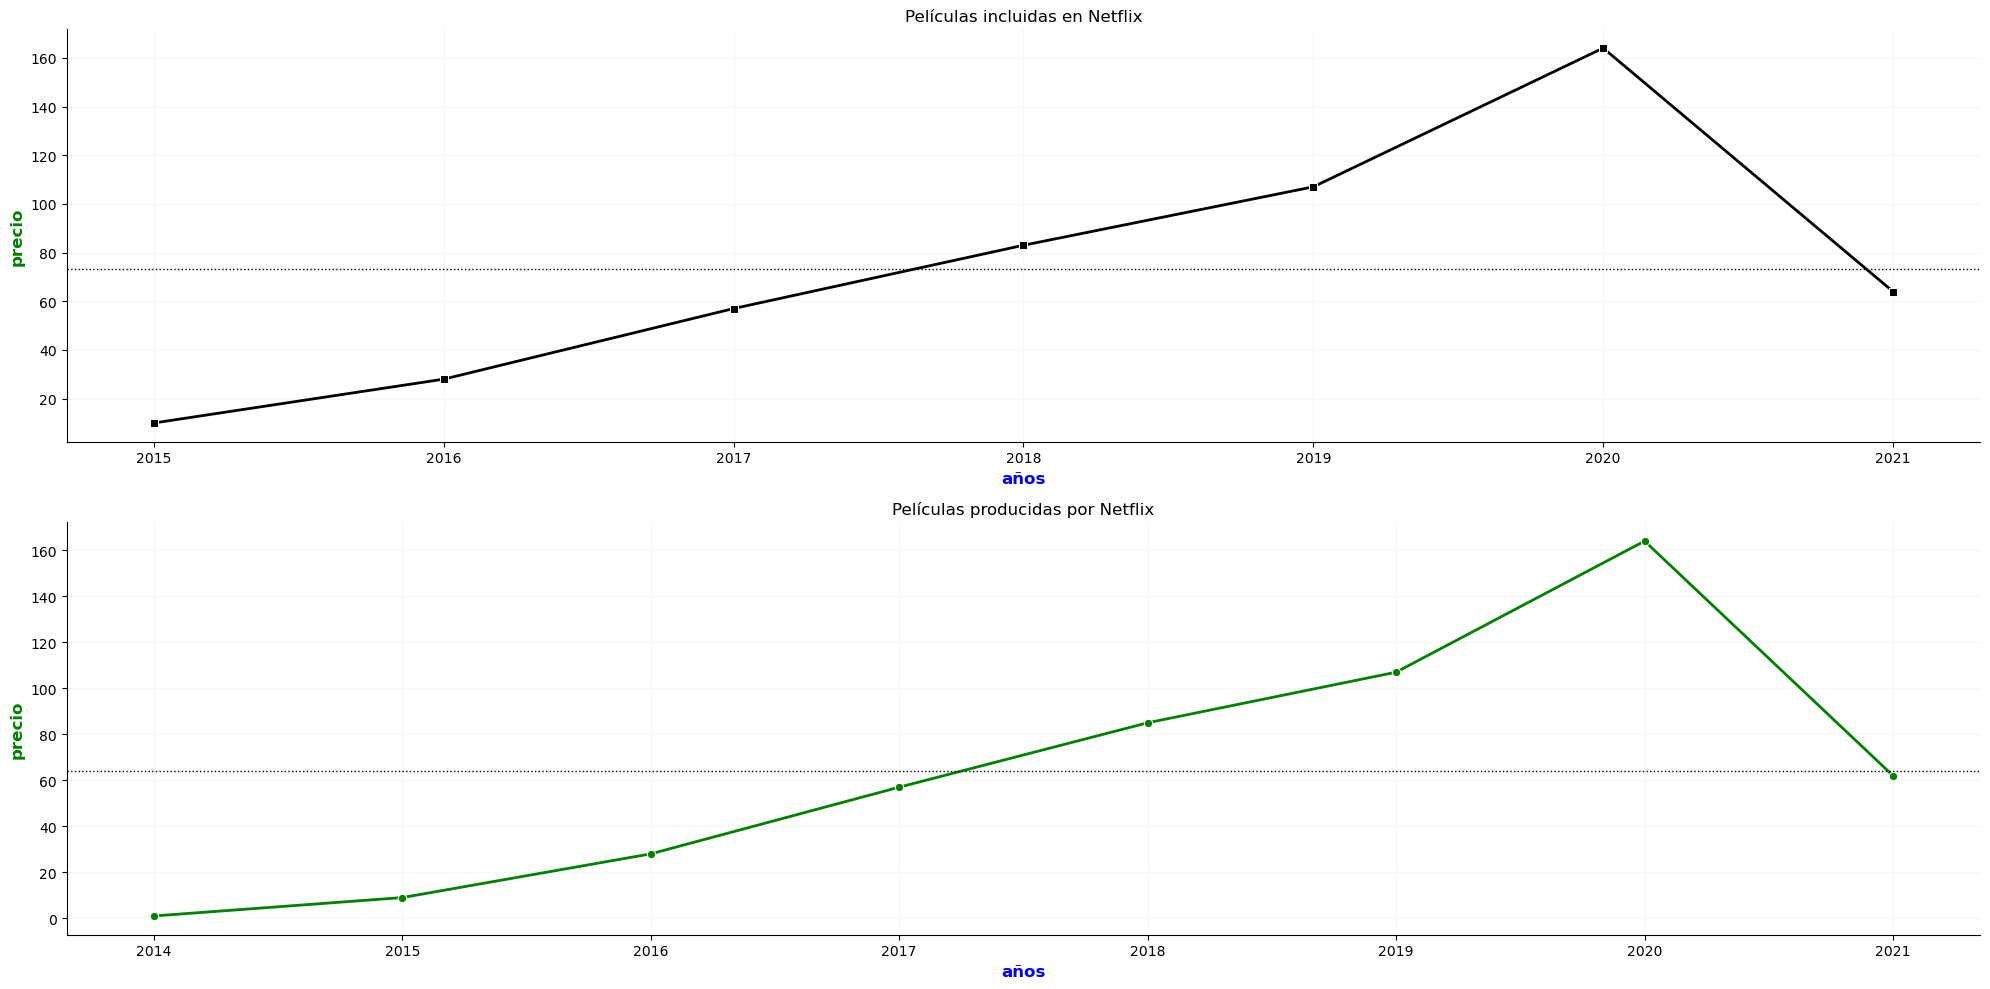

In [97]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))

sns.lineplot(data = df_año_aña, 
             x = "date_added", 
             y = "title", 
             marker = "s", 
             ax = axes[0], 
             linewidth = 2, 
             color = "black")

sns.lineplot(data = df_año_pre, 
             x = "premiere", 
             y = "title",
             marker = "o", 
             ax = axes[1], 
             linewidth = 2, 
             color = "green" )

axes[0].set_title("Películas incluidas en Netflix")
axes[1].set_title("Películas producidas por Netflix")


# para quitar los ejes de arriba y de la derecha         
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)        

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)


# para cambiar el nombre el eje x
axes[0].set_xlabel('años', color = "blue", fontweight = "bold", fontsize = 12)
axes[1].set_xlabel('años', color = "blue", fontweight = "bold", fontsize = 12)

# para cambiar el nombre el eje y
axes[0].set_ylabel('precio', color = "green", fontweight = "bold", fontsize = 12)
axes[1].set_ylabel('precio', color = "green", fontweight = "bold", fontsize = 12)




# para añadir un grid/rejilla a la gráfica
axes[0].grid(visible=True, color = "aliceblue")
axes[1].grid(visible=True, color = "aliceblue")

media_aña = df_año_aña["title"].mean()
media_pre = df_año_pre["title"].mean()



# para añadir una linea fija en el plot
axes[0].axhline(media_aña, color='black', linewidth=1, linestyle='dotted'); # las opciones que tenemos de estilo de linea '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
axes[1].axhline(media_pre, color='black', linewidth=1, linestyle='dotted'); # las opciones que tenemos de estilo de linea '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'


fig.tight_layout();

Para más marcadores [aqui](https://matplotlib.org/3.1.0/api/markers_api.html)

# Creditos de actores y directores

In [98]:
df_directors = pd.read_csv("data/top10_directors.csv", sep = ";")
df_actors = pd.read_csv("data/top10_actors.csv", sep = ";")

In [99]:
df_actors.head(2)

,name,image,description,positions,known_for,Banda sonora,Guion y continuidad,Composición,sonido de archivo,Música,Como sí mismos,Agradecimientos,metraje de archivo,Producción,Dirección,Equipos adicionales
0,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El aguador,34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN
1,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,"6,1",34.0,7.0,3.0,2.0,1.0,256.0,10.0,80.0,NaN,NaN,NaN


In [100]:
nuevo_orden = ['name', 'image', 'description', 'positions', 'known_for',
       'Banda sonora', 'Guion y continuidad', 'Composición',
       'sonido de archivo', 'Música',  'Agradecimientos',
       'metraje de archivo', 'Producción', 'Dirección', 'Equipos adicionales', 'Como sí mismos']
df_actors = df_actors.reindex(columns = nuevo_orden)

In [101]:
df_actors.head(2)

,name,image,description,positions,known_for,Banda sonora,Guion y continuidad,Composición,sonido de archivo,Música,Agradecimientos,metraje de archivo,Producción,Dirección,Equipos adicionales,Como sí mismos
0,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,El aguador,34.0,7.0,3.0,2.0,1.0,10.0,80.0,NaN,NaN,NaN,256.0
1,Adam Sandler,https://m.media-amazon.com/images/M/MV5BMjQyNz...,"Adam Richard Sandler was born September 9, 196...",Reparto Producción Guion,"6,1",34.0,7.0,3.0,2.0,1.0,10.0,80.0,NaN,NaN,NaN,256.0


In [102]:
actor = input(f"¿De que actor quieres ver las métricas? {df_actors['name'].unique().tolist()}")

df_seleccion = df_actors[df_actors["name"] == actor ]
total_pelis_actor = int(df_seleccion["Como sí mismos"].unique()[0])
df_seleccion_filtrado = df_seleccion.iloc[:, 5:-1].head(1).T.reset_index()
df_seleccion_filtrado.columns = ["creditos", "total"]
df_seleccion_filtrado.dropna(inplace = True)
df_seleccion_filtrado.sort_values(by = "total", ascending = False, inplace = True)

sns.barplot(data = df_seleccion_filtrado, x = "creditos", y = "total", palette= "mako")
plt.figtext(0.85, 0.75, f'Tiene un total de {total_pelis_actor} pelis \n como actor', horizontalalignment='right'  )
plt.xticks(rotation=45);

IndexError: index 0 is out of bounds for axis 0 with size 0

# Películas por género

In [ ]:
df.head(2)

,title,director,cast,country,language,rating,genre,premiere,date_added,duration,imdb_score,genre2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,English,PG-13,documentary,2020-10-02,2021-09-25,90.0,7.5,documentary
1,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",English,R,action,2020-04-24,2021-09-01,82.0,6.7,action


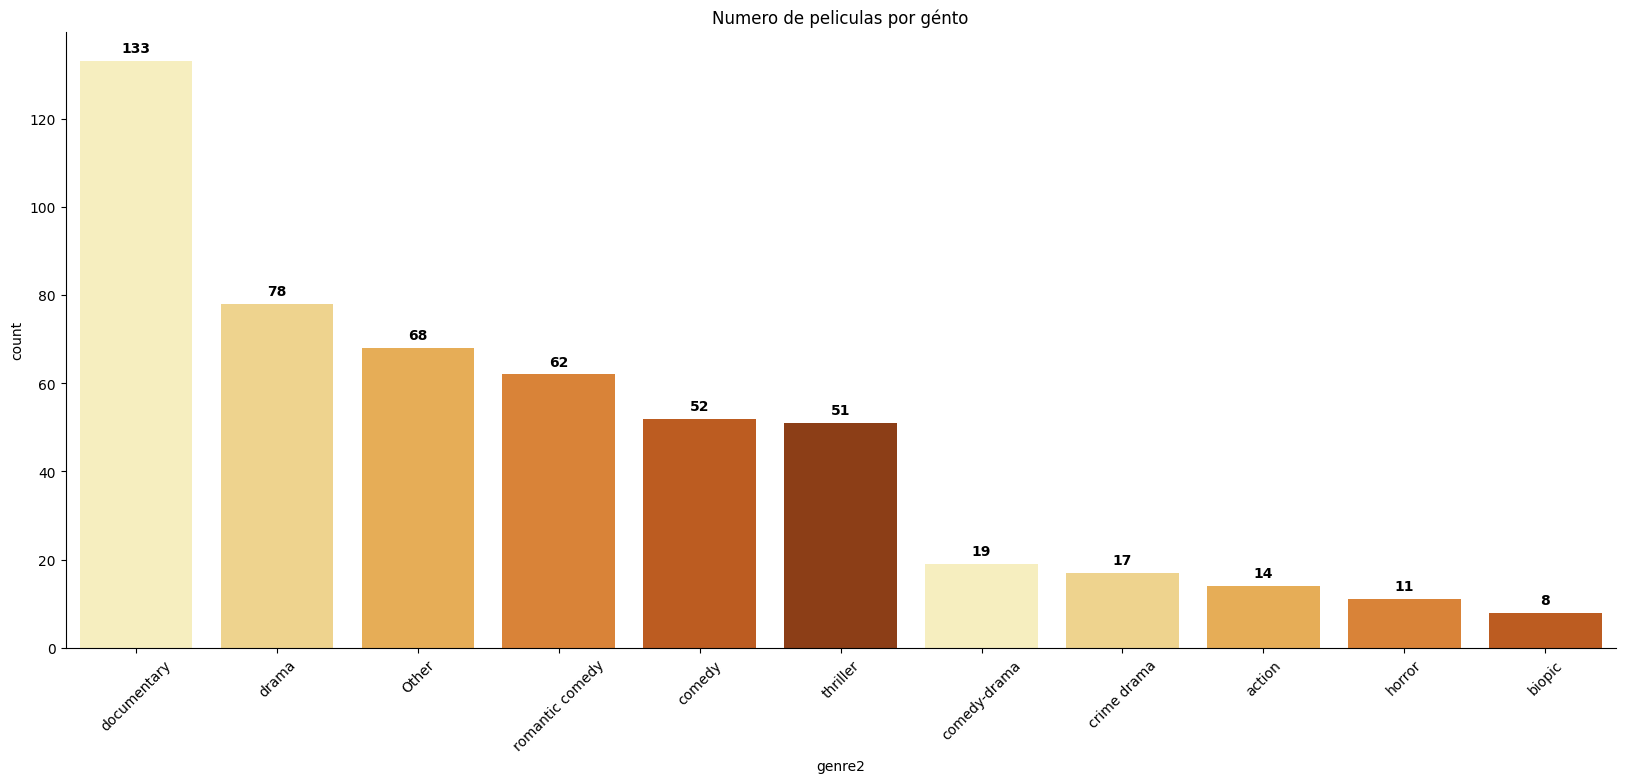

In [ ]:
plt.figure(figsize =(20,8)) # para establecer el tamaño de la gráfica
fig = sns.countplot(data = df, x = "genre2",  
                    palette=sns.color_palette("YlOrBr"), 
                    order = df["genre2"].value_counts().index) 
plt.xticks(rotation=45) # para girar las etiquetas del eje-x
plt.title("Numero de peliculas por génto")

ejex = df["genre2"].value_counts().index.tolist()
ejey = df["genre2"].value_counts().values.tolist()

for valor, etiqueta in zip(range(len(ejex)), ejey):
    fig.annotate(etiqueta, # el valor que queremos poner encima de las barras
                 (valor, etiqueta + 2), # las coordenadas de las posiciones de las etiquetas
                 fontweight = "bold" , # si queremos la letra en negrita
   
                 horizontalalignment='center' ) # para centrar la leyenda en el centro de la barra
# para quitar los ejes de arriba y de la derecha         
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)        

plt.show();

# Nube de palabras

In [ ]:
def generate_cloud_normal(column, filename):

    # Joining all the words in the description column into one string.
    text = " ".join(cat for cat in df[column])

    word_cloud = WordCloud(
        width=7000,
        height=2000,
        background_color="black",
        colormap="OrRd",
        collocations=True,
        stopwords=STOPWORDS,
        ).generate(text)

    # Showing the word cloud.
    plt.imshow(word_cloud)


    # Turning off the axis.
    plt.axis("off")

    # Showing the word cloud.
    plt.show()

    word_cloud.to_file(f'data/{filename}.png')

In [ ]:
df.head(2)

,title,director,cast,country,language,rating,genre,premiere,date_added,duration,imdb_score,genre2
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,English,PG-13,documentary,2020-10-02,2021-09-25,90.0,7.5,documentary
1,Extraction,Steven C. Miller,"Bruce Willis, Kellan Lutz, Gina Carano, D.B. S...","United States, United Kingdom, Canada",English,R,action,2020-04-24,2021-09-01,82.0,6.7,action


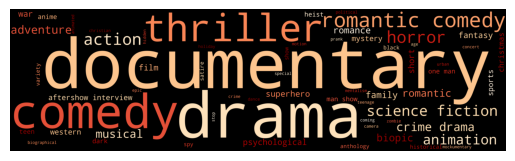

In [ ]:
generate_cloud_normal("genre", "genre" )

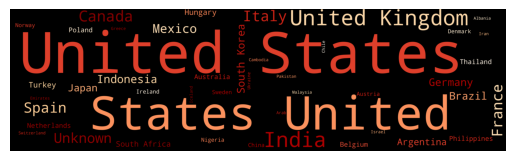

In [ ]:
generate_cloud_normal("country", "country_normal" )